# 4. 텍스트

## OpenCV 에서 사용하는 글꼴 종류
1. cv2.FONT_HERSHEY_SIMPLEX : 보통 크기의 산 세리프(sans-serif) 글꼴
1. cv2.FONT_HERSHEY_PLAIN : 작은 크기의 산 세리프 글꼴
1. cv2.FONT_HERSHEY_SCRIPT_SIMPLEX : 필기체 스타일 글꼴
1. cv2.FONT_HERSHEY_TRIPLEX : 보통 크기의 세리프 글꼴
1. cv2.FONT_ITALIC : 기울임 (이탤릭체)

In [4]:
import numpy as np
import cv2

img = np.zeros((480, 640, 3), dtype=np.uint8)

SCALE = 1 # 글자크기
COLOR = (255, 255, 255) # 흰색
THICKNESS = 1 # 두께
# 이 순서대로 putText()안에 넣음

cv2.putText(img, "Nado Simplex", (20, 50), cv2.FONT_HERSHEY_SIMPLEX, SCALE, COLOR, THICKNESS)
# 그릴 위치, 텍스트 내용, 시작 위치, 폰트 종류, 크기, 색깔, 두께
cv2.putText(img, "Nado Plain", (20, 150), cv2.FONT_HERSHEY_PLAIN, SCALE, COLOR, THICKNESS)
cv2.putText(img, "Nado Script Simplex", (20, 250), cv2.FONT_HERSHEY_SCRIPT_SIMPLEX, SCALE, COLOR, THICKNESS)
cv2.putText(img, "Nado Triplex", (20, 350), cv2.FONT_HERSHEY_TRIPLEX, SCALE, COLOR, THICKNESS)
cv2.putText(img, "Nado Italic", (20, 450), cv2.FONT_HERSHEY_TRIPLEX | cv2.FONT_ITALIC, SCALE, COLOR, THICKNESS)
#이탤릭 기울임은 폰트자체를 바꿔주는게 아니라 특수효과를 주는거기 때문에 |를 쓰고 그 뒤에 넣어줘야함

cv2.imshow('img', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

# 결과값

- scale, thickness를 변경하면 달라지기도 함

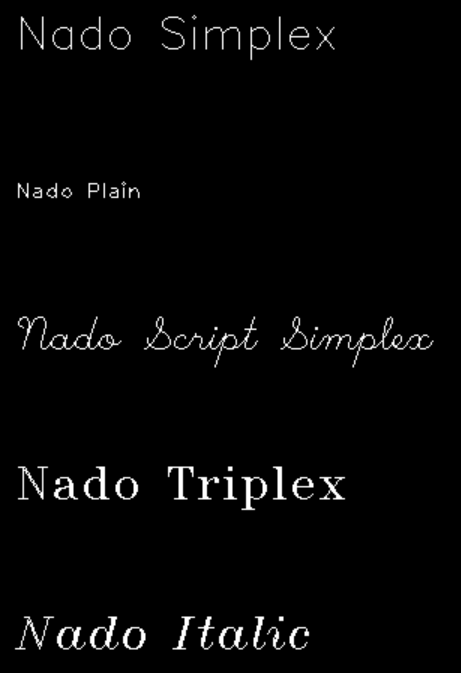

## 한글

In [5]:
import numpy as np
import cv2

img = np.zeros((480, 640, 3), dtype=np.uint8)

SCALE = 1 # 크기
COLOR = (255, 255, 255) # 흰색
THICKNESS = 1 # 두께

cv2.putText(img, "나도코딩", (20, 50), cv2.FONT_HERSHEY_SIMPLEX, SCALE, COLOR, THICKNESS)
# 그릴 위치, 텍스트 내용, 시작 위치, 폰트 종류, 크기, 색깔, 두께

cv2.imshow('img', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

한글로 적었을 때는 글자가 깨져서 나옴

한글을 제공안하기 때문에
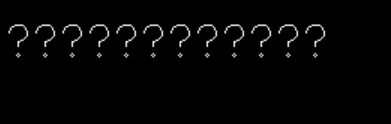

# 한글 우회 방법



In [6]:
import numpy as np
import cv2
# PIL (Python Image Library) -> 이 라이브러리 도움을 받아서 우회하기
from PIL import ImageFont, ImageDraw, Image

def myPutText(src, text, pos, font_size, font_color):#텍스트가 들어가는 대상, 텍스트, 텍스트의 위치, 폰트 사이즈, 컬러
    img_pil = Image.fromarray(src)
    draw = ImageDraw.Draw(img_pil)
    font = ImageFont.truetype('fonts/gulim.ttc', font_size) # 굴림체
    draw.text(pos, text, font=font, fill=font_color)
    return np.array(img_pil)

#그대로 적기

img = np.zeros((480, 640, 3), dtype=np.uint8)

FONT_SIZE = 30
COLOR = (255, 255, 255) # 흰색

# cv2.putText(img, "나도코딩", (20, 50), cv2.FONT_HERSHEY_SIMPLEX, SCALE, COLOR, THICKNESS)
# 그릴 위치, 텍스트 내용, 시작 위치, 폰트 종류, 크기, 색깔, 두께
# cv2로 할때는 바로 정의해도 상관없었지만 여기는 받아줄 변수를 설정해주어야함
img = myPutText(img, "나도코딩", (20, 50), FONT_SIZE, COLOR)
#def에서return값을 받아오기 위해 src는 img로 임의로 넣고 나도코딩, 2050 등의 설정값을 받은 img로 재탄생?시킴

cv2.imshow('img', img)
cv2.waitKey(0)
cv2.destroyAllWindows()